# Lab Assignment Four: The Multi-Layer Perceptron

### Load, Split, and Balance

#### Load Data
Save data into a dataframe. Remove any obervations with missing data. Encode string data as integers

**Data Set** : US Census Data - https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks

In [1]:
#Import all necessary utilities
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import re
from scipy.special import expit
import sys
warnings.simplefilter('ignore', DeprecationWarning)

#Loading the dataset
data = pd.read_csv('../Data/acs2017_census_tract_data.csv', low_memory=False)

#Showing data
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

TractId        State           County  TotalPop   Men  Women  \
0       1001020100      Alabama   Autauga County      1845   899    946   
1       1001020200      Alabama   Autauga County      2172  1167   1005   
2       1001020300      Alabama   Autauga County      3385  1533   1852   
3       1001020400      Alabama   Autauga County      4267  2001   2266   
4       1001020500      Alabama   Autauga County      9965  5054   4911   
...            ...          ...              ...       ...   ...    ...   
73996  72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976   
73997  72153750502  Puerto Rico  Yauco Municipio      2342   959   1383   
73998  72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217   
73999  72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416   
74000  72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658   

       Hispanic  White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  \
0           2.4   86.3    5.2     0.0  ...   0.5          0.0         2.1   
1           1.1   41.6   54.5     0.0  ...   0.0          0.5         0.0   
2           8.0   61.4   26.5     0.6  ...   1.0          0.8         1.5   
3           9.6   80.3    7.1     0.5  ...   1.5          2.9         2.1   
4           0.9   77.5   16.4     0.0  ...   0.8          0.3         0.7   
...         ...    ...    ...     ...  ...   ...          ...         ...   
73996      99.7    0.3    0.0     0.0  ...   0.5          0.0         3.6   
73997      99.1    0.9    0.0     0.0  ...   0.0          0.0         1.3   
73998      99.5    0.2    0.0     0.0  ...   3.4          0.0         3.4   
73999     100.0    0.0    0.0     0.0  ...   0.0          0.0         0.0   
74000      99.2    0.8    0.0     0.0  ...   4.9          0.0         8.9   

       MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
0             24.5       881         74.2        21.2           4.5   
1             22.2       852         75.9        15.0           9.0   
2             23.1      1482         73.3        21.1           4.8   
3             25.9      1849         75.8        19.7           4.5   
4             21.0      4787         71.4        24.1           4.5   
...            ...       ...          ...         ...           ...   
73996         26.9      1576         59.2        33.8           7.0   
73997         25.3       666         58.4        35.4           6.2   
73998         23.5       560         57.5        34.5           8.0   
73999         24.1      1062         67.7        30.4           1.9   
74000         21.6       759         75.9        19.1           5.0   

       FamilyWork  Unemployment  
0             0.0           4.6  
1             0.0           3.4  
2             0.7           4.7  
3             0.0           6.1  
4             0.0           2.3  
...           ...           ...  
73996         0.0          20.8  
73997         0.0          26.3  
73998         0.0          23.0  
73999         0.0          29.5  
74000         0.0          17.9  

[74001 rows x 37 columns]

In [2]:
#Remove all rows with null values
data.dropna(inplace=True);

#Convert all String Values to Integers
data[['State', 'County']] = data[['State', 'County']].apply(lambda x: pd.factorize(x)[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  int64  
 2   County            72718 non-null  int64  
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

#### Splitting Data
Split the dataset into 80% training and 20% testing

In [3]:
# Creating our data matrix (X) and our target variable (y) that we will work on from the dataframe we have
X = data[['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']]
y = data.ChildPoverty.to_numpy()
print("The shape of the data matrix: " + str(X.shape))
print("The shape of the target variable: " + str(y.shape))

The shape of the data matrix: (72718, 36)
The shape of the target variable: (72718,)


In [4]:
# Dividing the data into training and testing data using an 80% training and 20% testing split.
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=0)
print("The training matrix and target shapes: " + str(X_train.shape)+ ' & ' + str(y_train.shape))
print("The testing matrix and target shapes: " + str(X_test.shape)+ ' & ' + str(y_test.shape))

The training matrix and target shapes: (58174, 36) & (58174,)
The testing matrix and target shapes: (14544, 36) & (14544,)


#### Balancing Data
Balance the dataset so there are the same number of instances within each class. Explain the reasoning of which method you chose.

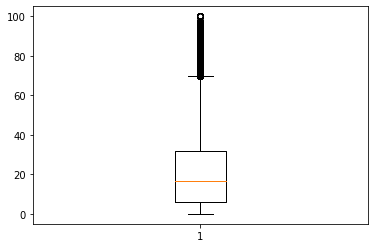

In [5]:
#original split into 4 classes : low, average, high, and extreme poverty
#Graph general boxplot to see break-up
plt.boxplot(y_train)
plt.show()

#Calculate Quartiles
Q1, median, Q3 = np.percentile(np.asarray(y_train), [25, 50, 75])
IQR = Q3 - Q1

loval = Q1 - 1.5 * IQR
hival = Q3 + 1.5 * IQR

#Calculate Classes
#Low is less than Q1, Average is between Q1-Q3, High is between Q3 and highval, extreme are outliers above highval
def classify(row):
    if row['ChildPoverty'] < Q1:
        val = 0
    elif row['ChildPoverty'] < Q3:
        val = 1
    elif row['ChildPoverty'] < hival:
        val = 2
    else : 
        val = 3
    return val

data['cp_class'] = data.apply(classify, axis=1)

#Split again to convert y_train and y_test to classes
y = data.cp_class.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=0)

<BarContainer object of 4 artists>

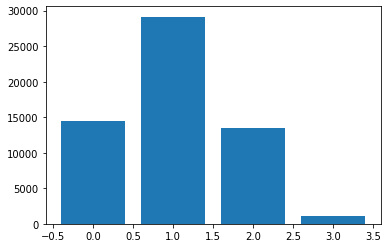

In [6]:
#Make sure there are equal number of instances in each class
#Graph of balance
plt.bar(np.unique(y_train), np.unique(y_train, return_counts=True)[1])

<BarContainer object of 4 artists>

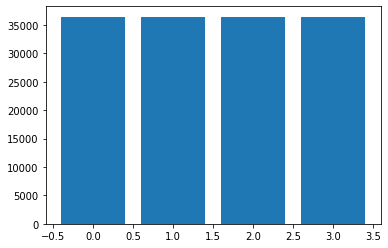

In [7]:
# Making an instance of SMOTE class 
# For oversampling of minority class
from imblearn.over_sampling import SMOTE

smote = SMOTE()
  
# Fit predictor (x variable)
# and target (y variable) using fit_resample()
X_OverSmote, y_OverSmote = smote.fit_resample(X.copy(), y.copy())
plt.bar(np.unique(y_OverSmote), np.unique(y_OverSmote, return_counts=True)[1])

**Should balancing of the dataset be done for both the training and testing set? Explain.** <br/>
Balancing should be done on just the training dataset and not the testing set. The model has already adjusted for imbalance to have equal awareness of the underrepresented classes, so it does not matter what data it is tested against. Additionally, while we want the data we train on to minimize biases, we do want the data we test against to be a reflection of the true values of the data.

### Pre-processing

#### Two-Layer Perceptron
Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 

In [8]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity 
        
        grad2 = V2 @ A2.T # no bias on final layer
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [9]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [10]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [11]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2

In [12]:
def analyze_two_layer_perceptron(X_train, y_train, X_test, y_test):
    vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

    nn_tradit = TLPMiniBatchCrossEntropy(**vals)
    nn_better = TLPBetterInitial(**vals)

    %time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
    %time nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

    print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
    print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
    plt.show()

In [13]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    cost_avgs = [np.mean(x) for x in nn.cost_]
    plt.plot(range(len(cost_avgs)), cost_avgs, color=color,label=title)
    plt.ylabel('Cost')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

Epoch: 20/20

CPU times: user 8.46 s, sys: 982 ms, total: 9.44 s
Wall time: 9.5 s


Epoch: 20/20

CPU times: user 8.33 s, sys: 952 ms, total: 9.28 s
Wall time: 9.34 s
Traditional :
Resubstitution acc: 0.24929666861083474
Validation acc: 0.2528132290380129
Glorot Initial :
Resubstitution acc: 0.25073764023741724
Validation acc: 0.247049540277206


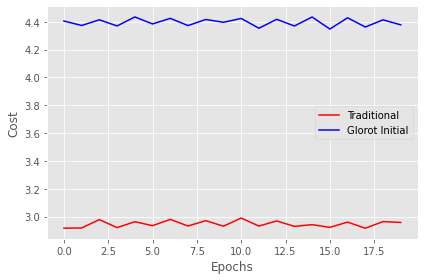

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_OverSmote.copy().to_numpy(), y_OverSmote.copy(), test_size=0.2, random_state=0)
analyze_two_layer_perceptron(X_train, y_train, X_test, y_test)

#### Normalize Continuous Numeric Feature Data
Now normalize the continuous numeric feature data AND one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 

In [15]:
#One-hot encode categorical data
from sklearn.preprocessing import OneHotEncoder

X_OverSmote_One_Hot = pd.concat((X_OverSmote,pd.get_dummies(X_OverSmote)),1)

Epoch: 20/20

CPU times: user 10.2 s, sys: 861 ms, total: 11.1 s
Wall time: 11.2 s


Epoch: 20/20

CPU times: user 10.3 s, sys: 828 ms, total: 11.1 s
Wall time: 11.2 s
Traditional :
Resubstitution acc: 0.24929666861083474
Validation acc: 0.2528132290380129
Glorot Initial :
Resubstitution acc: 0.25073764023741724
Validation acc: 0.247049540277206


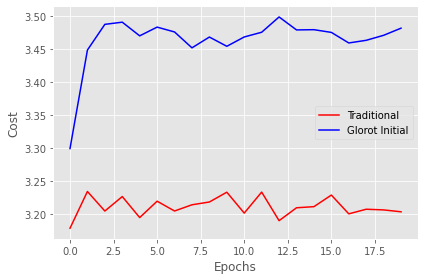

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_OverSmote_One_Hot.copy().to_numpy(), y_OverSmote.copy(), test_size=0.2, random_state=0)
analyze_two_layer_perceptron(X_train, y_train, X_test, y_test)

#### Normalize Numeric Feature Data
Now normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

In [17]:
#Normalize Continuous Numeric Feature Data
from sklearn.preprocessing import Normalizer 
normalizer = Normalizer(norm = 'l2')
X_OverSmote_Normal = normalizer.transform(X_OverSmote)

Epoch: 20/20

CPU times: user 9.5 s, sys: 433 ms, total: 9.93 s
Wall time: 9.99 s


Epoch: 20/20

CPU times: user 9.46 s, sys: 457 ms, total: 9.91 s
Wall time: 10 s
Traditional :
Resubstitution acc: 0.24969122036573232
Validation acc: 0.25123507616303004
Glorot Initial :
Resubstitution acc: 0.25073764023741724
Validation acc: 0.247049540277206


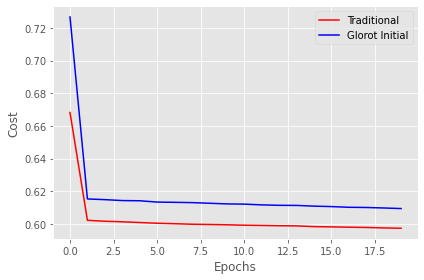

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_OverSmote_Normal.copy(), y_OverSmote.copy(), test_size=0.2, random_state=0)
analyze_two_layer_perceptron(X_train, y_train, X_test, y_test)

#### Compare Performance
Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  

In [ ]:
#McNemar Testing
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/PDF_Slides/current%20slides/ML_6a_dl_history.pdf


#### Normalize and One-Code Dataset

Epoch: 20/20

CPU times: user 11.2 s, sys: 851 ms, total: 12.1 s
Wall time: 12.1 s


Epoch: 20/20

CPU times: user 11.3 s, sys: 821 ms, total: 12.1 s
Wall time: 12.2 s
Traditional :
Resubstitution acc: 0.25073764023741724
Validation acc: 0.247049540277206
Glorot Initial :
Resubstitution acc: 0.24929666861083474
Validation acc: 0.2528132290380129


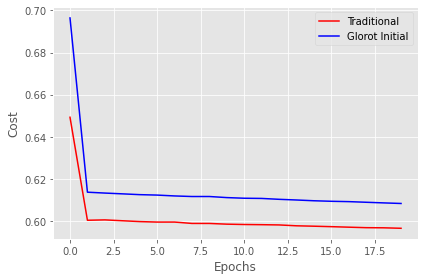

In [19]:
X_OverSmote = pd.concat((X_OverSmote,pd.get_dummies(X_OverSmote)),1)
X_OverSmote = normalizer.transform(X_OverSmote)
X_train, X_test, y_train, y_test = train_test_split(X_OverSmote.copy(), y_OverSmote.copy(), test_size=0.2, random_state=0)
analyze_two_layer_perceptron(X_train, y_train, X_test, y_test)

### Modeling

#### Third Layer of Perceptron
Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch. For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm. Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

In [32]:
#Combine all above examples into one simple class
#
class TwoLayerPerceptron(object):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=None):
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

Epoch: 20/20

CPU times: user 10.7 s, sys: 799 ms, total: 11.5 s
Wall time: 11.7 s
Traditional :
Resubstitution acc: 0.25073764023741724
Validation acc: 0.247049540277206


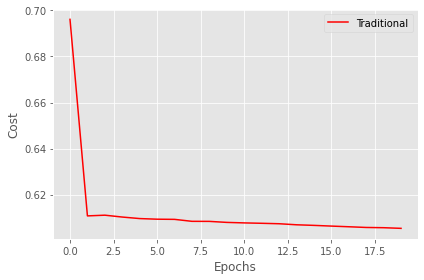

In [35]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_tradit = TwoLayerPerceptron(**vals)

%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
plt.show()

#### Fourth Layer of Perceptron

#### Fifth Layer of Perceptron

#### Adaptive Learning
Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network. Compare the performance of this model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique. 